In [135]:
import numpy as np # linear algebra
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [136]:
#creating other libraries I plan to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable


In [137]:

import kagglehub

# Download latest version
df_pre = pd.read_csv("Chennai houseing sale.csv")
print(df_pre)

      PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0     P03210  Karapakkam      1004  04-05-2011            131        1.0   
1     P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2     P01812       Adyar       909  04-02-2012             70        1.0   
3     P05346   Velachery      1855  13-03-2010             14        3.0   
4     P06210  Karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  Karapakkam       598  03-01-2011             51        1.0   
7105  P10000   Velachery      1897  08-04-2004             52        3.0   
7106  P09594   Velachery      1614  25-08-2006            152        2.0   
7107  P06508  Karapakkam       787  03-08-2009             40        1.0   
7108  P09794   Velachery      1896  13-07-2005            156        3.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  ... UTILITY_AVAIL  \
0            1.0

In [138]:
# Use shape to find the number of rows and columns in the dataset
print(f'\033[94mNumber of rows in the dataset are: {df_pre.shape[0]}]')
print(f'\033[94mNumber of columns in the dataset are: {df_pre.shape[1]}] ')
print(f'\033[94mNumber of valuses in the dataset are {df_pre.count().sum()}]')
print(f'\033[94mNumber of valuses missing in the dataset are {sum(df_pre.isna().sum())}]')

Number of rows in the dataset are: 7109]
Number of columns in the dataset are: 22] 
Number of valuses in the dataset are 156344]
Number of valuses missing in the dataset are 54]


In [139]:
#Listing the features with null values and null value count 
# 1. Calculate the null sums once and save them.
null_counts = pd.isnull(df_pre).sum()
print(null_counts)

# 2. Filter the saved result.
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64
N_BEDROOM      1
N_BATHROOM     5
QS_OVERALL    48
dtype: int64


In [140]:
#dealing with null values through interpolation
df= df_pre.interpolate()
#checking for any null values after modifying if it is null increase by 1
pd.isnull(df).sum()[pd.isnull(df).sum() > 0]

C:\Users\nansi\AppData\Local\Temp\ipykernel_7500\3105849523.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df= df_pre.interpolate()


Series([], dtype: int64)

In [141]:
#returns the first five rows in the dataset
df.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [142]:
#Lists all column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [143]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [144]:
#creates mean, std, quarterlines rowns and flips them for summary statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INT_SQFT,7109.0,1.382073e+03,4.574109e+02,500.0,993.00,1373.0,1.744000e+03,2500.00
DIST_MAINROAD,7109.0,9.960318e+01,5.740311e+01,0.0,50.00,99.0,1.480000e+02,200.00
N_BEDROOM,7109.0,1.637009e+00,8.028467e-01,1.0,1.00,1.0,2.000000e+00,4.00
N_BATHROOM,7109.0,1.213321e+00,4.095526e-01,1.0,1.00,1.0,1.000000e+00,2.00
N_ROOM,7109.0,3.688704e+00,1.019099e+00,2.0,3.00,4.0,4.000000e+00,6.00
QS_ROOMS,7109.0,3.517471e+00,8.919724e-01,2.0,2.70,3.5,4.300000e+00,5.00
QS_BATHROOM,7109.0,3.507244e+00,8.978337e-01,2.0,2.70,3.5,4.300000e+00,5.00
QS_BEDROOM,7109.0,3.485300e+00,8.872664e-01,2.0,2.70,3.5,4.300000e+00,5.00
QS_OVERALL,7109.0,3.503641e+00,5.263276e-01,2.0,3.13,3.5,3.885000e+00,4.97
REG_FEE,7109.0,3.769383e+05,1.430707e+05,71177.0,272406.00,349486.0,4.515620e+05,983922.00


In [145]:
#converting to date time
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])

C:\Users\nansi\AppData\Local\Temp\ipykernel_7500\3574667405.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])


<Figure size 1200x800 with 0 Axes>

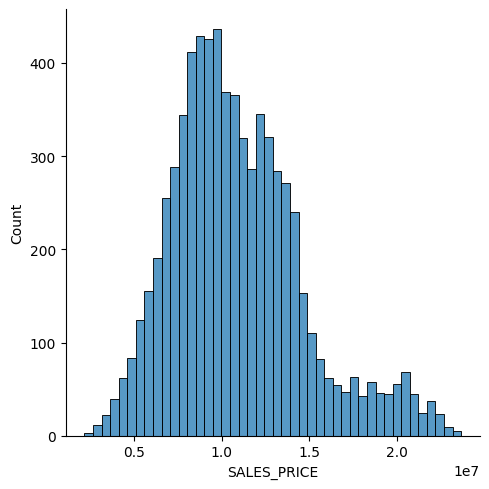

In [146]:
plt.figure(figsize=(12,8))
#displot function for seaborn
sns.displot(df['SALES_PRICE'])

In [147]:
#sort Prt values by descending first
df.groupby('AREA').count()['PRT_ID'].sort_values(ascending=False)

AREA
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Ana Nagar        3
Karapakam        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: PRT_ID, dtype: int64

In [148]:
#converting of floats to integers
df['N_BATHROOM'] = df['N_BATHROOM'].astype(int)
df['QS_BATHROOM'] = df['QS_BATHROOM'].astype(int)

In [149]:
#helps replace old values with new values 
df = df.apply(lambda x: x.replace({'Adyr':'Adyar', 'TNagar': 'T Nagar', 'Chrompt': 'Chrompet', 'Chrmpet':'Chrompet', 'Chormpet': 'Chrompet', 'Ann Nagar': 'Anna Nagar',  'Ana Nagar': 'Anna Nagar', 'Velchery': 'Velachery', 'KKNagar': 'KK Nagar', 'Karapakam':'Karapakkam', 'Ab Normal': 'AbNormal', 'Partiall':'Partial', 'PartiaLl': 'Partial', 'AdjLand': 'Adj Land', 'Noo': 'No', 'Comercial':'Commercial', 'Others': 'Other', 'AllPub': 'All Pub', 'NoSewr ':'NoSeWa', 'NoAccess': 'No Access', 'Pavd':'Paved'}, regex=True))
for col in df.columns:
    if df[col].dtype == 'object':
        print()
        print(col)
        print(df[col].unique())


PRT_ID
['P03210' 'P09411' 'P01812' ... 'P09594' 'P06508' 'P09794']

AREA
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']

DATE_SALE
['04-05-2011' '19-12-2006' '04-02-2012' ... '28-03-2014' '25-08-2006'
 '13-07-2005']

SALE_COND
['AbNormal' 'Family' 'Partial' 'Adj Land' 'Normal Sale']

PARK_FACIL
['Yes' 'No']

BUILDTYPE
['Commercial' 'Other' 'House']

UTILITY_AVAIL
['All Pub' 'ELO' 'NoSeWa']

STREET
['Paved' 'Gravel' 'No Access']

MZZONE
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [150]:
#finds distinct unique values in that column
df['N_BEDROOM'].unique()

array([1. , 2. , 3. , 4. , 1.5])

<Axes: xlabel='N_BEDROOM', ylabel='count'>

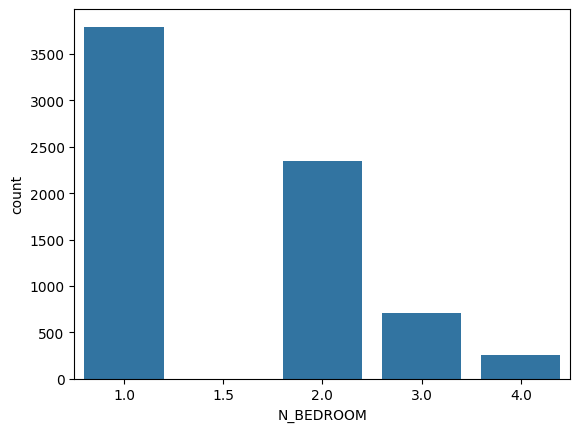

In [151]:

#plotting a specific column
sns.countplot(data=df, x='N_BEDROOM')

<Axes: xlabel='N_ROOM', ylabel='count'>

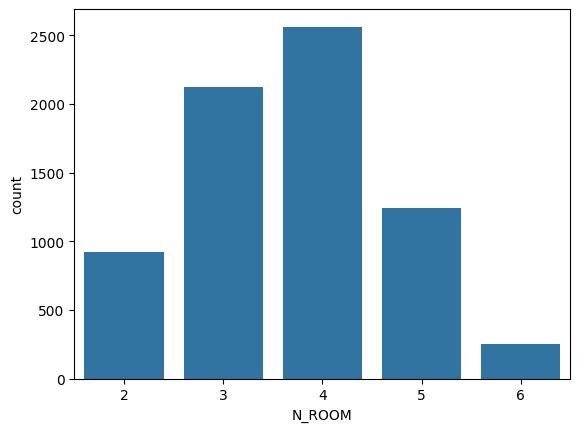

In [152]:
sns.countplot(data=df, x='N_ROOM')

<Axes: xlabel='INT_SQFT', ylabel='SALES_PRICE'>

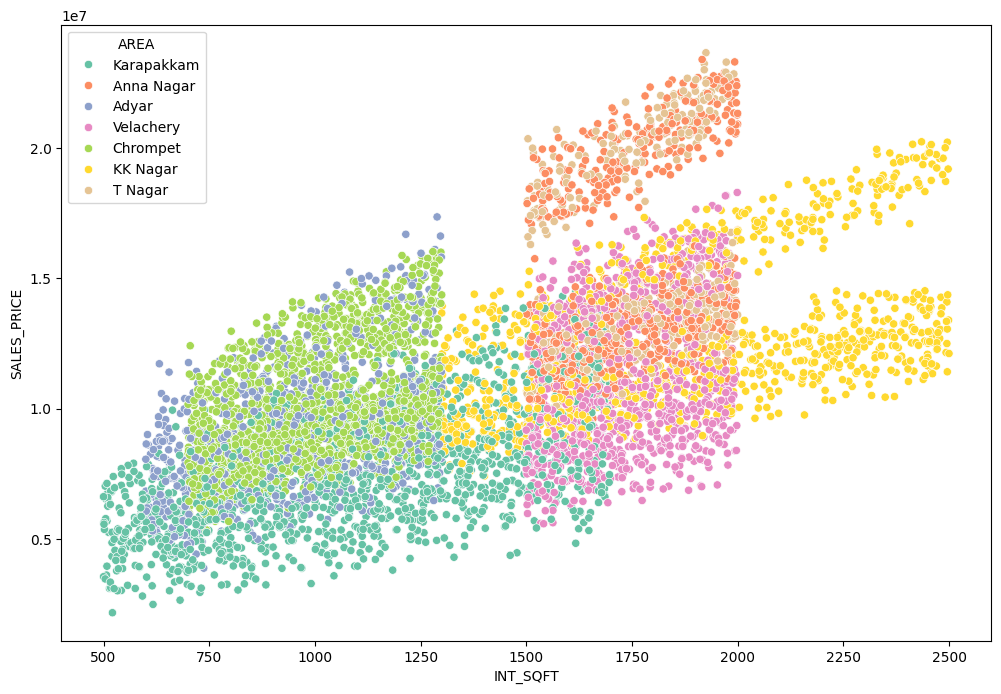

In [153]:
# sales price against square feet
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='INT_SQFT', y='SALES_PRICE',hue='AREA',palette="Set2")

<function matplotlib.pyplot.show(close=None, block=None)>

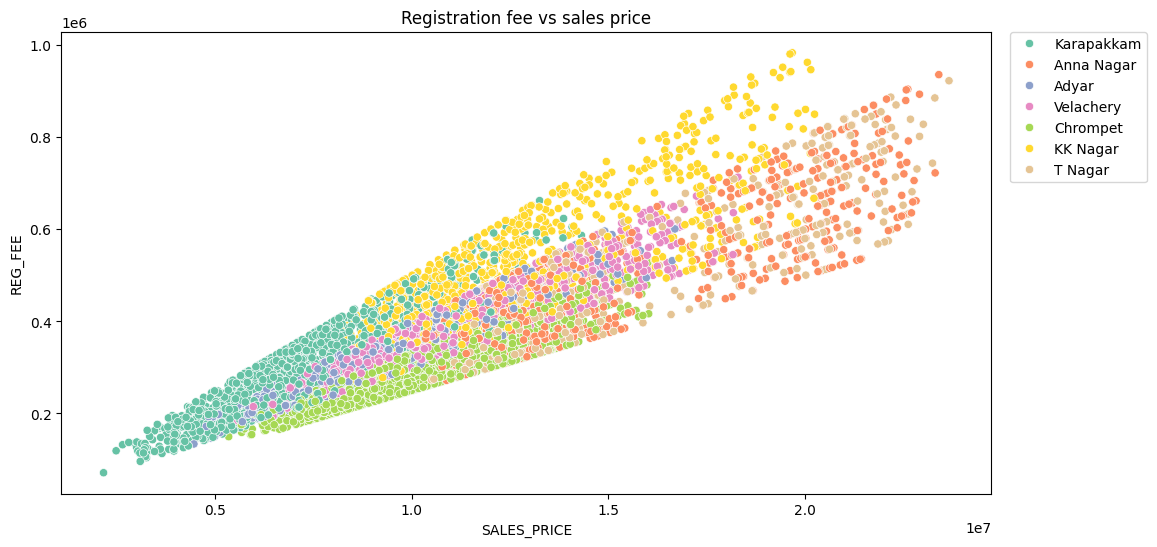

In [154]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='SALES_PRICE', y='REG_FEE', hue='AREA', palette="Set2", data=df).set(title='Registration fee vs sales price')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show

<Axes: xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

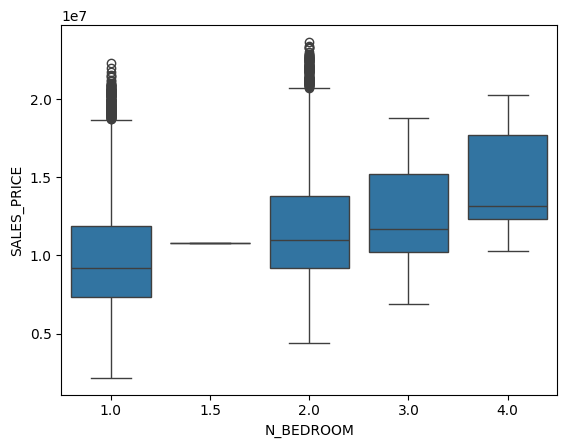

In [155]:
sns.boxplot(data=df, x='N_BEDROOM', y= 'SALES_PRICE') 

<Axes: xlabel='AREA', ylabel='SALES_PRICE'>

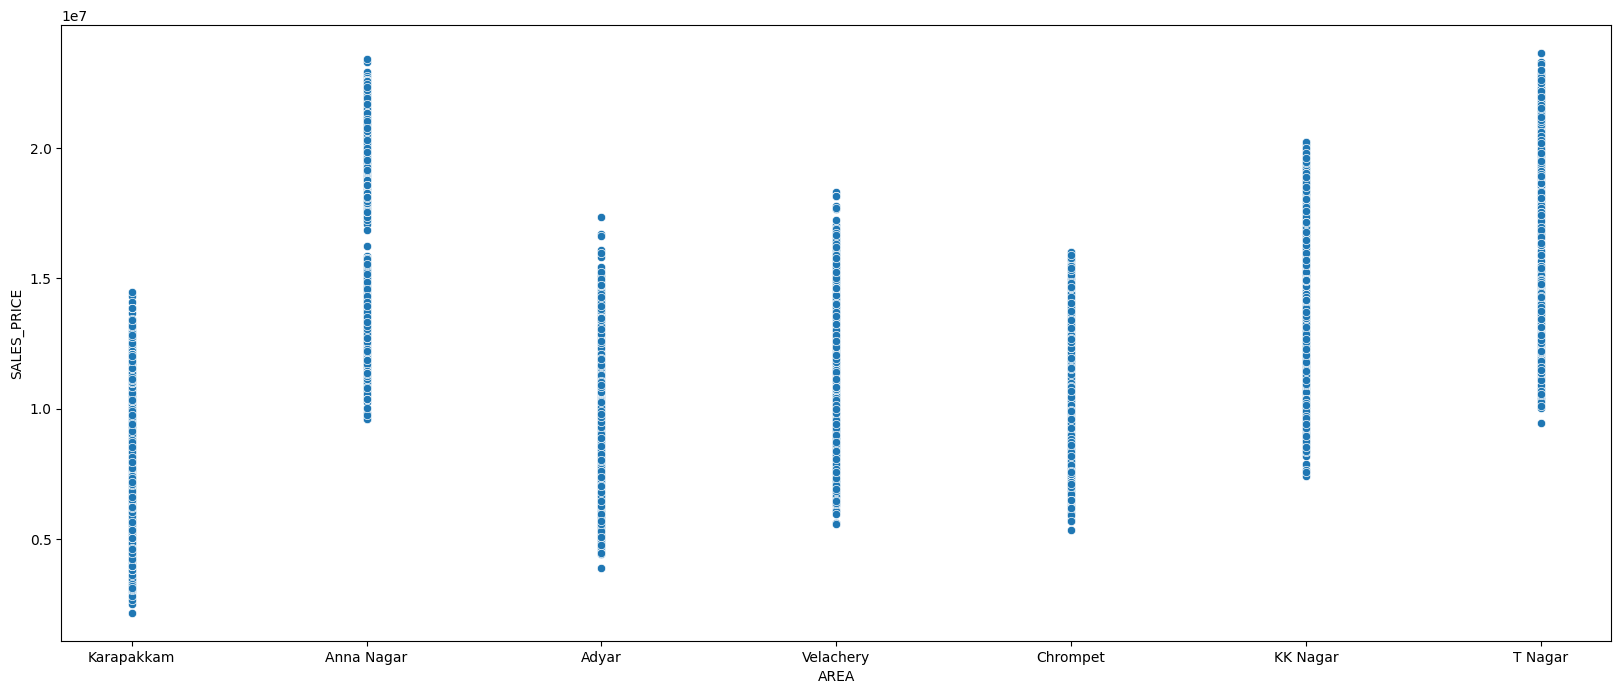

In [156]:
plt.figure(figsize=(20,8))
#scatter plot of area vs sales_price
sns.scatterplot(data=df, x='AREA', y='SALES_PRICE')

<Axes: xlabel='PARK_FACIL', ylabel='SALES_PRICE'>

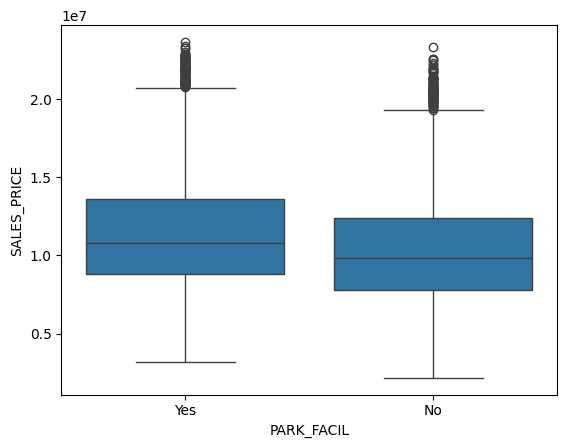

In [157]:
sns.boxplot(data=df, x='PARK_FACIL',y='SALES_PRICE')

<Axes: xlabel='DIST_MAINROAD', ylabel='SALES_PRICE'>

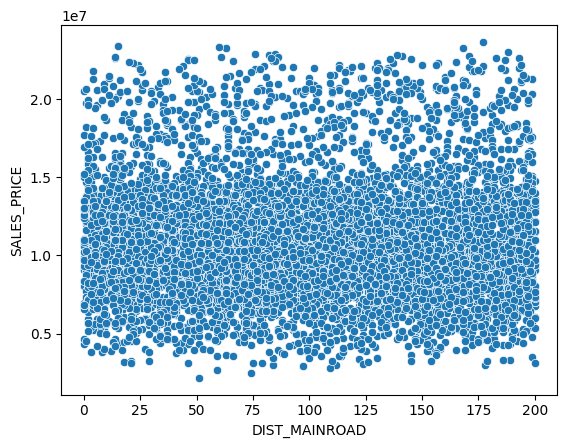

In [158]:
sns.scatterplot(data = df, x='DIST_MAINROAD', y='SALES_PRICE')

In [159]:
df['age'] = pd.DatetimeIndex(df['DATE_SALE']).year - pd.DatetimeIndex(df['DATE_BUILD']).year
df['age'].head(5)

0    44
1    11
2    20
3    22
4    30
Name: age, dtype: int32

C:\Users\nansi\AppData\Local\Temp\ipykernel_7500\1203219073.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df,x='age', y='SALES_PRICE', hue='AREA', style="AREA",ci=None, linewidth=3, dashes=False)


<Axes: xlabel='age', ylabel='SALES_PRICE'>

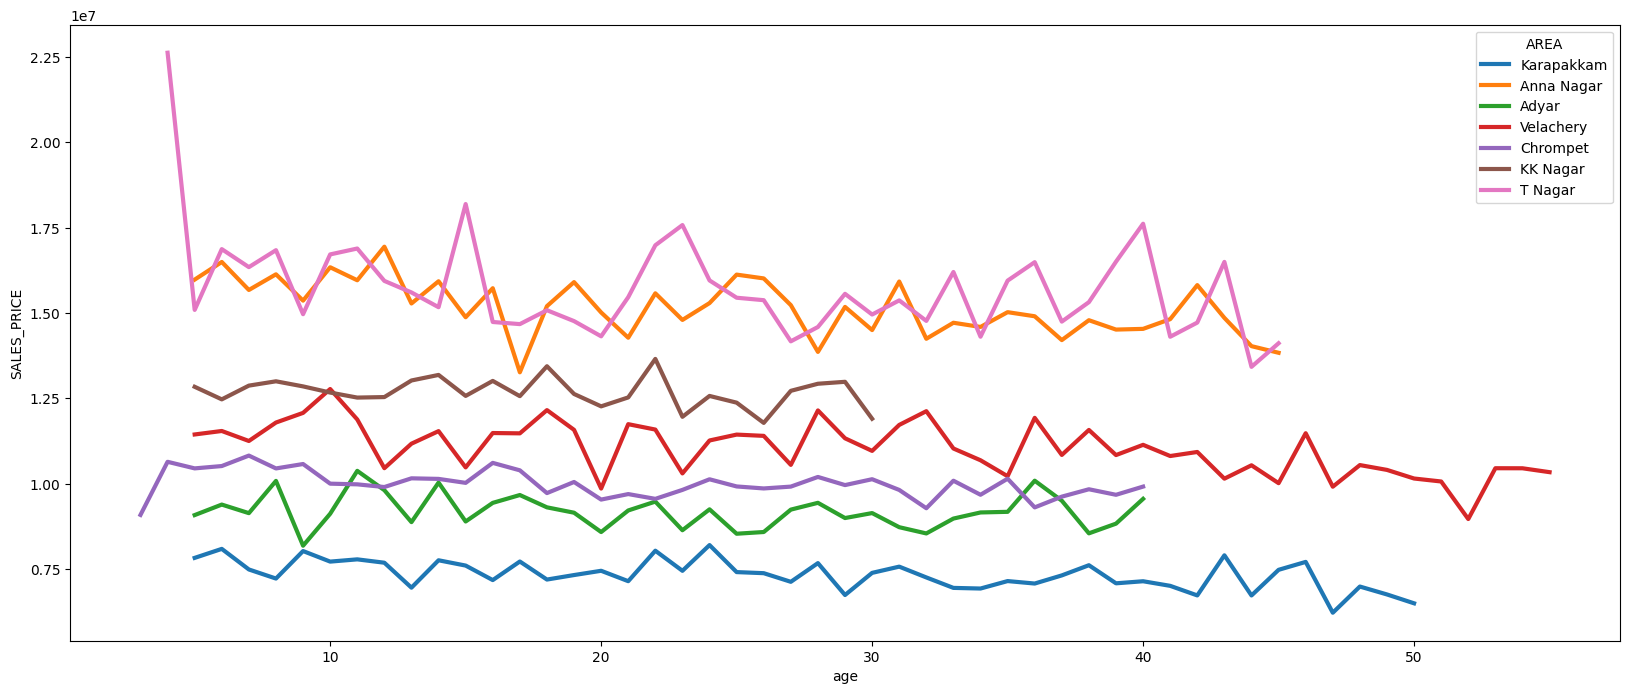

In [160]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='age', y='SALES_PRICE', hue='AREA', style="AREA",ci=None, linewidth=3, dashes=False)

<Axes: xlabel='AREA', ylabel='count'>

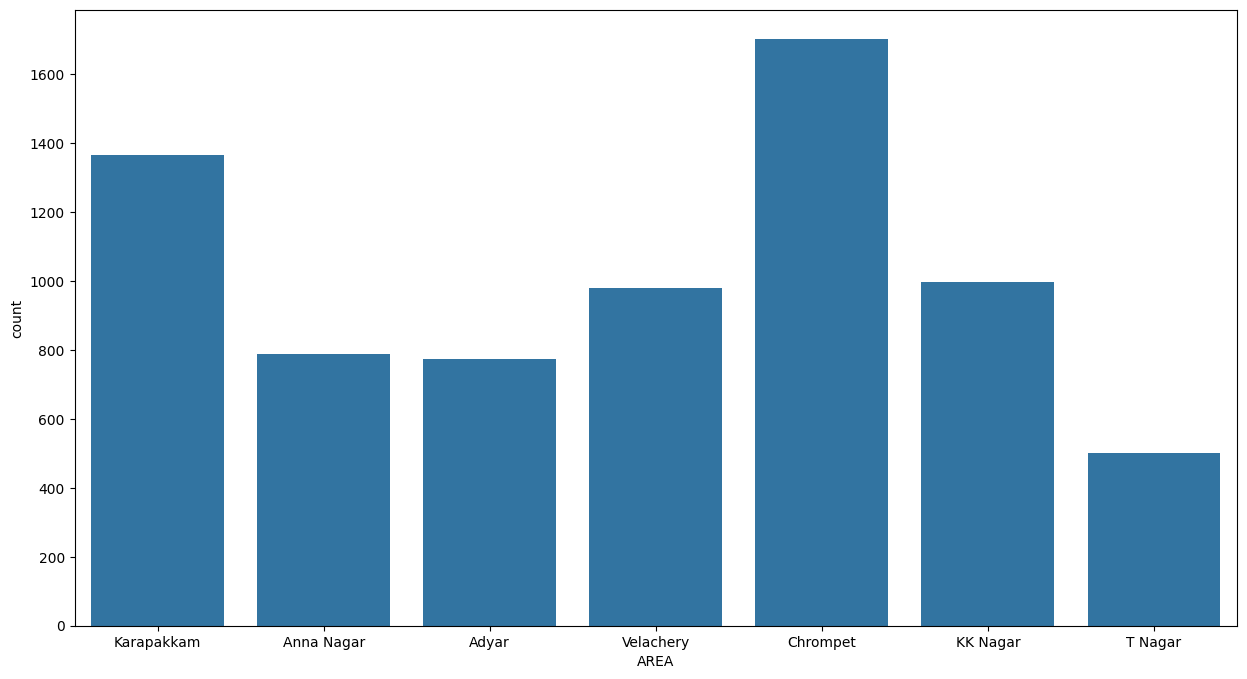

In [161]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x="AREA")

In [162]:
columns_of_interest = ['INT_SQFT', 'N_BEDROOM', 'N_ROOM', 'REG_FEE','COMMIS','SALES_PRICE',]
# to find how tow values correlate to one another
# Create a subset DataFrame with the selected columns
subset_df = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Print the correlation matrix
print(correlation_matrix)

             INT_SQFT  N_BEDROOM    N_ROOM   REG_FEE    COMMIS  SALES_PRICE
INT_SQFT     1.000000   0.786329  0.951279  0.657544  0.571076     0.612125
N_BEDROOM    0.786329   1.000000  0.840271  0.455360  0.430428     0.330999
N_ROOM       0.951279   0.840271  1.000000  0.630932  0.533343     0.602760
REG_FEE      0.657544   0.455360  0.630932  1.000000  0.659903     0.878148
COMMIS       0.571076   0.430428  0.533343  0.659903  1.000000     0.626275
SALES_PRICE  0.612125   0.330999  0.602760  0.878148  0.626275     1.000000


<Axes: >

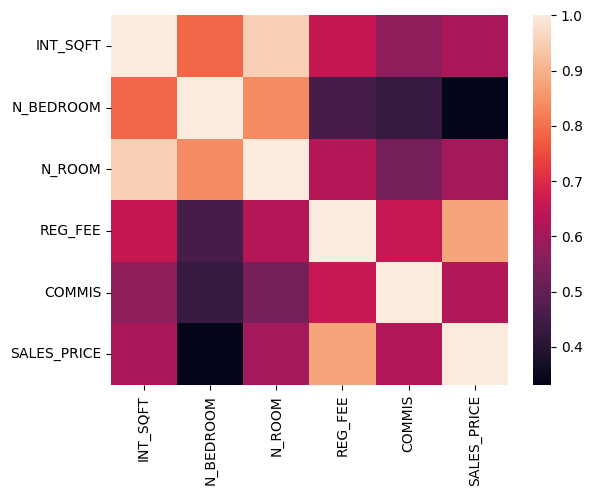

In [163]:
sns.heatmap(df[['INT_SQFT', 'N_BEDROOM', 'N_ROOM', 'REG_FEE', 'COMMIS','SALES_PRICE']].corr())

In [164]:
# U can even group sales price by year
#df.groupby('year').mean()['SALES_PRICE']

In [165]:
df['MZZONE'].value_counts()

MZZONE
RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: count, dtype: int64

In [166]:
cat_df = df[['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']]
num_df = df[['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','REG_FEE','COMMIS','SALES_PRICE','SALES_PRICE', 'age']]

In [167]:
!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder ()
cat_df = df.select_dtypes(exclude = ["int", float])
for i in cat_df:
    cat_df[i] = le.fit_transform(df[i])
num_df = df.select_dtypes(include = ['int', 'float'])
main_df = pd.concat([num_df, cat_df], axis =1)

Defaulting to user installation because normal site-packages is not writeable


In [168]:
main_df.head(5)

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,...,PRT_ID,AREA,DATE_SALE,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,1004,131,1.0,1,3,4.0,3,4.9,4.330,380000,...,2266,4,310,0,1,544,0,0,2,0
1,1986,26,2.0,1,5,4.9,4,2.5,3.765,760122,...,6664,1,1745,0,0,4300,0,0,0,3
2,909,70,1.0,1,3,4.1,3,2.2,3.090,421094,...,1270,0,288,0,1,3767,0,1,0,4
3,1855,14,3.0,2,5,4.7,3,3.6,4.010,356321,...,3755,6,1117,2,0,3204,2,2,2,2
4,1226,84,1.0,1,3,3.0,2,4.1,3.290,237000,...,4393,4,442,0,1,1987,2,0,0,1


In [169]:
X = main_df.drop('SALES_PRICE', axis = 1)
y = main_df['SALES_PRICE']
from sklearn.model_selection import train_test_split

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 101 )

In [173]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [175]:
X_train = scaler.fit_transform(X_train)

In [176]:
X_test = scaler.transform(X_test)

In [177]:
X_train.shape

(4976, 22)

In [178]:
X_test.shape

(2133, 22)

In [183]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

2.20.0


In [184]:
model = Sequential()
model.add(Dense(19, activation ='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19,activation ='relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss='mse')
model.fit(x=X_train, y=y_train.values, validation_data =(X_test,y_test.values), batch_size=128, epochs=400)

Epoch 1/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 132303539929088.0000 - val_loss: 134289559650304.0000
Epoch 2/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 132303439265792.0000 - val_loss: 134289324769280.0000
Epoch 3/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 132302558461952.0000 - val_loss: 134287210840064.0000
Epoch 4/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 132297156198400.0000 - val_loss: 134276305649664.0000
Epoch 5/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 132275505201152.0000 - val_loss: 134238363975680.0000
Epoch 6/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 132211080691712.0000 - val_loss: 134136501108736.0000
Epoch 7/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 132056101158912.0000 - val_loss: 133909278883840.0000
Epoch 8/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 131734616145920.0000 - val_loss: 133465160810496.0000
Epoch 9/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 131140669145088.0000 - val_loss: 1326

<Axes: >

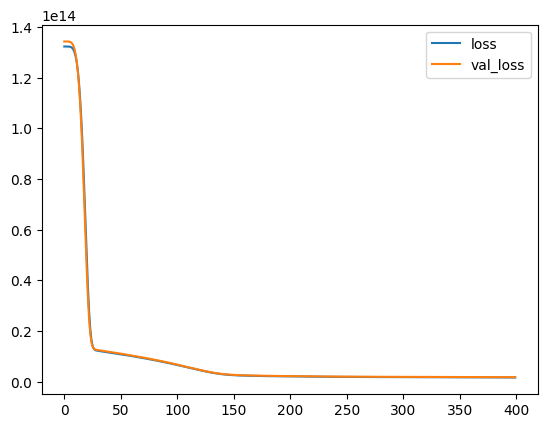

In [185]:
losses =pd.DataFrame(model.history.history)
losses.plot()

In [187]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
X_test

array([[0.86793397, 0.105     , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.3841921 , 0.61      , 0.33333333, ..., 1.        , 0.5       ,
        0.6       ],
       [0.73736868, 0.62      , 0.66666667, ..., 1.        , 1.        ,
        0.8       ],
       ...,
       [0.11005503, 0.615     , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.97198599, 0.845     , 1.        , ..., 0.        , 0.        ,
        0.6       ],
       [0.18109055, 0.39      , 0.        , ..., 1.        , 1.        ,
        0.2       ]], shape=(2133, 22))

In [ ]:
predictions = model.predict(X_test)
mean_absolute_error(y_test, predictions)


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


1050184.0

In [189]:
np.sqrt(mean_squared_error(y_test, predictions))

np.float64(1316347.2205280794)

In [190]:
df['SALES_PRICE'].mean()

np.float64(10894909.63918976)

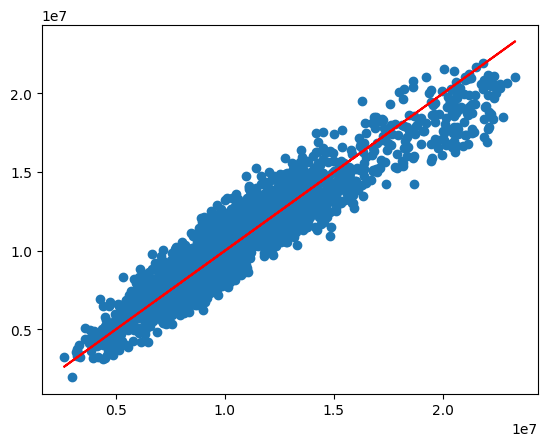

In [191]:
plt.scatter(y_test, predictions)
plt.plot(y_test,y_test,'r')

In [ ]:

single_house = main_df.drop('SALES_PRICE', axis =1).iloc[0]


In [203]:
single_house = scaler.transform(single_house.values.reshape(-1,21))

ValueError: cannot reshape array of size 22 into shape (21)

In [196]:
single_house

INT_SQFT           1004.00
DIST_MAINROAD       131.00
N_BEDROOM             1.00
N_BATHROOM            1.00
N_ROOM                3.00
QS_ROOMS              4.00
QS_BATHROOM           3.00
QS_BEDROOM            4.90
QS_OVERALL            4.33
REG_FEE          380000.00
COMMIS           144400.00
age                  44.00
PRT_ID             2266.00
AREA                  4.00
DATE_SALE           310.00
SALE_COND             0.00
PARK_FACIL            1.00
DATE_BUILD          544.00
BUILDTYPE             0.00
UTILITY_AVAIL         0.00
STREET                2.00
MZZONE                0.00
Name: 0, dtype: float64

In [197]:
model.predict(single_house)

InvalidArgumentError: Graph execution error:

Detected at node sequential_1/dense_1/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\tornado\platform\asyncio.py", line 211, in start

  File "c:\Python313\Lib\asyncio\base_events.py", line 683, in run_forever

  File "c:\Python313\Lib\asyncio\base_events.py", line 2050, in _run_once

  File "c:\Python313\Lib\asyncio\events.py", line 89, in _run

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\ipykernel\kernelbase.py", line 519, in dispatch_queue

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\ipykernel\kernelbase.py", line 508, in process_one

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\ipykernel\kernelbase.py", line 400, in dispatch_shell

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\ipykernel\ipkernel.py", line 368, in execute_request

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\ipykernel\ipkernel.py", line 455, in do_execute

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\ipykernel\zmqshell.py", line 577, in run_cell

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\IPython\core\interactiveshell.py", line 3116, in run_cell

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\IPython\core\interactiveshell.py", line 3171, in _run_cell

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\IPython\core\interactiveshell.py", line 3394, in run_cell_async

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\IPython\core\interactiveshell.py", line 3639, in run_ast_nodes

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\IPython\core\interactiveshell.py", line 3699, in run_code

  File "C:\Users\nansi\AppData\Local\Temp\ipykernel_7500\187171665.py", line 1, in <module>

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\backend\tensorflow\trainer.py", line 566, in predict

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\backend\tensorflow\trainer.py", line 260, in one_step_on_data_distributed

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\backend\tensorflow\trainer.py", line 250, in one_step_on_data

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\backend\tensorflow\trainer.py", line 105, in predict_step

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\layer.py", line 941, in __call__

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\ops\operation.py", line 59, in __call__

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\models\sequential.py", line 220, in call

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\models\functional.py", line 183, in call

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\ops\function.py", line 206, in _run_through_graph

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\models\functional.py", line 644, in call

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\layer.py", line 941, in __call__

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\ops\operation.py", line 59, in __call__

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py", line 155, in call

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\activations\activations.py", line 47, in relu

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\activations\activations.py", line 101, in static_call

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\backend\tensorflow\nn.py", line 15, in relu

Matrix size-incompatible: In[0]: [22,1], In[1]: [22,19]
	 [[{{node sequential_1/dense_1/Relu}}]] [Op:__inference_one_step_on_data_distributed_82950]

In [198]:
df.iloc[0]

PRT_ID                        P03210
AREA                      Karapakkam
INT_SQFT                        1004
DATE_SALE                 04-05-2011
DIST_MAINROAD                    131
N_BEDROOM                        1.0
N_BATHROOM                         1
N_ROOM                             3
SALE_COND                   AbNormal
PARK_FACIL                       Yes
DATE_BUILD       1967-05-15 00:00:00
BUILDTYPE                 Commercial
UTILITY_AVAIL                All Pub
STREET                         Paved
MZZONE                             A
QS_ROOMS                         4.0
QS_BATHROOM                        3
QS_BEDROOM                       4.9
QS_OVERALL                      4.33
REG_FEE                       380000
COMMIS                        144400
SALES_PRICE                  7600000
age                               44
Name: 0, dtype: object

In [199]:
single_house_t = main_df.drop('SALES_PRICE', axis =1).iloc[1]
single_house_t = scaler.transform(single_house_t.values.reshape(-1,21))


ValueError: cannot reshape array of size 22 into shape (21)

In [200]:
single_house_t

INT_SQFT           1986.000
DIST_MAINROAD        26.000
N_BEDROOM             2.000
N_BATHROOM            1.000
N_ROOM                5.000
QS_ROOMS              4.900
QS_BATHROOM           4.000
QS_BEDROOM            2.500
QS_OVERALL            3.765
REG_FEE          760122.000
COMMIS           304049.000
age                  11.000
PRT_ID             6664.000
AREA                  1.000
DATE_SALE          1745.000
SALE_COND             0.000
PARK_FACIL            0.000
DATE_BUILD         4300.000
BUILDTYPE             0.000
UTILITY_AVAIL         0.000
STREET                0.000
MZZONE                3.000
Name: 1, dtype: float64

In [201]:
model.predict(single_house_t)

InvalidArgumentError: Graph execution error:

Detected at node sequential_1/dense_1/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\tornado\platform\asyncio.py", line 211, in start

  File "c:\Python313\Lib\asyncio\base_events.py", line 683, in run_forever

  File "c:\Python313\Lib\asyncio\base_events.py", line 2050, in _run_once

  File "c:\Python313\Lib\asyncio\events.py", line 89, in _run

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\ipykernel\kernelbase.py", line 519, in dispatch_queue

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\ipykernel\kernelbase.py", line 508, in process_one

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\ipykernel\kernelbase.py", line 400, in dispatch_shell

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\ipykernel\ipkernel.py", line 368, in execute_request

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\ipykernel\ipkernel.py", line 455, in do_execute

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\ipykernel\zmqshell.py", line 577, in run_cell

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\IPython\core\interactiveshell.py", line 3116, in run_cell

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\IPython\core\interactiveshell.py", line 3171, in _run_cell

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\IPython\core\interactiveshell.py", line 3394, in run_cell_async

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\IPython\core\interactiveshell.py", line 3639, in run_ast_nodes

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\IPython\core\interactiveshell.py", line 3699, in run_code

  File "C:\Users\nansi\AppData\Local\Temp\ipykernel_7500\187171665.py", line 1, in <module>

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\backend\tensorflow\trainer.py", line 566, in predict

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\backend\tensorflow\trainer.py", line 260, in one_step_on_data_distributed

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\backend\tensorflow\trainer.py", line 250, in one_step_on_data

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\backend\tensorflow\trainer.py", line 105, in predict_step

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\layer.py", line 941, in __call__

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\ops\operation.py", line 59, in __call__

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\models\sequential.py", line 220, in call

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\models\functional.py", line 183, in call

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\ops\function.py", line 206, in _run_through_graph

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\models\functional.py", line 644, in call

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\layer.py", line 941, in __call__

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\ops\operation.py", line 59, in __call__

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py", line 155, in call

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\activations\activations.py", line 47, in relu

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\activations\activations.py", line 101, in static_call

  File "C:\Users\nansi\AppData\Roaming\Python\Python313\site-packages\keras\src\backend\tensorflow\nn.py", line 15, in relu

Matrix size-incompatible: In[0]: [22,1], In[1]: [22,19]
	 [[{{node sequential_1/dense_1/Relu}}]] [Op:__inference_one_step_on_data_distributed_82950]

In [202]:
df.iloc[1]

PRT_ID                        P09411
AREA                      Anna Nagar
INT_SQFT                        1986
DATE_SALE                 19-12-2006
DIST_MAINROAD                     26
N_BEDROOM                        2.0
N_BATHROOM                         1
N_ROOM                             5
SALE_COND                   AbNormal
PARK_FACIL                        No
DATE_BUILD       1995-12-22 00:00:00
BUILDTYPE                 Commercial
UTILITY_AVAIL                All Pub
STREET                        Gravel
MZZONE                            RH
QS_ROOMS                         4.9
QS_BATHROOM                        4
QS_BEDROOM                       2.5
QS_OVERALL                     3.765
REG_FEE                       760122
COMMIS                        304049
SALES_PRICE                 21717770
age                               11
Name: 1, dtype: object